In [9]:
#Units are based on the user inputs 
#That is, keep the units consistent in the input variables
print("DEFLECTION OF CANTILEVER BEAM")
Length=float(input("Enter the length of Beam: "))                    #Beam length 
Breadth=float(input("Enter the Breadth of the cross section:"))      #Larger side of the cross section
Width=float(input("Enter the width of the cross section:"))          #Smaller side of cross section

Area=Breadth*Width                                                   #cross section area

E=float(input("Enter the Young's Modulus:"))                         #Youngs modulus input 
nodes=int(input("Enter the Mesh nodes Number:(How many nodes you want)"))#The discritization  

import numpy as np
Main=np.zeros((nodes*2,nodes*2))                                     #The stiffness matrix
Force=np.zeros((nodes*2-2,1))                                        #Force matrix 
L=Length/(nodes-1)                                                   #Elemental length
 
pointload=float(input("Enter the Load N at the end:"))               #Enter the Point load at the end node
Force[(nodes*2)-2-2][0]=pointload
b=np.zeros((nodes*2,1))
matrix=np.zeros((4,4))
I=(Breadth*(Width**3))/12                                            #Moment of Inertia
Add=np.zeros((nodes*2,nodes*2))
inverse=np.zeros((nodes*2-2,nodes*2-2))                              
for i in range(nodes*2):                                             #Global Matrix assemblage using elemental matrix
    for j in range(nodes*2):
        if i==j and i%2==0 and j%2==0 and i!=nodes*2-2 and j!=nodes*2-2:
            Add[i][j]=((E*I)/L**3)*12
            Add[i][j+1]=((E*I)/L**3)*6*L
            Add[i][j+2]=((E*I)/L**3)*-12
            Add[i][j+3]=((E*I)/L**3)*6*L

            Add[i+1][j]=((E*I)/L**3)*6*L
            Add[i+1][j+1]=((E*I)/L**3)*4*L**2
            Add[i+1][j+2]=((E*I)/L**3)*-6*L
            Add[i+1][j+3]=((E*I)/L**3)*2*L**2

            Add[i+2][j]=((E*I)/L**3)*-12
            Add[i+2][j+1]=((E*I)/L**3)*-6*L
            Add[i+2][j+2]=((E*I)/L**3)*12
            Add[i+2][j+3]=((E*I)/L**3)*-6*L

            Add[i+3][j]=((E*I)/L**3)*6*L
            Add[i+3][j+1]=((E*I)/L**3)*2*L**2
            Add[i+3][j+2]=((E*I)/L**3)*-6*L
            Add[i+3][j+3]=((E*I)/L**3)*4*L**2
            Main=Main+Add
            Add.fill(0)
from numpy.linalg import inv                                        #importing the inverse function for matrix
from scipy import linalg                                            #Linear Equation solution function importing
for i in range(nodes*2):
    for j in range(nodes*2):
        if i >1 and j>1:
            inverse[i-2][j-2]=Main[i][j]                            #Inverse of the matrix

solution=np.dot(inv(inverse),Force)                                 #Finding the variable matrix by dot product

print("FEM Calculation:",solution[(nodes*2)-1-2-1][0])              #will display the deflection of last node
print("Analytical formula:",(pointload*Length**3)/(3*E*I))          #deflection by formula (WL^3/3EI)
print("Error% : ",100*(((pointload*Length**3)/(3*E*I))-(solution[(nodes*2)-1-2-1][0]))/((pointload*Length**3)/(3*E*I)))

DEFLECTION OF CANTILEVER BEAM
Enter the length of Beam: 1000
Enter the Breadth of the cross section:15
Enter the width of the cross section:50
Enter the Young's Modulus:200000
Enter the Mesh nodes Number:(How many nodes you want)100
Enter the Load N at the end:300
FEM Calculation: 3.1999999826041665
Analytical formula: 3.2
Error% :  5.436198019515004e-07


DEFLECTION OF CANTILEVER BEAM
Enter the length of Beam: 2000
Enter the Breadth of the cross section:20
Enter the width of the cross section:20
Enter the Young's Modulus:200000
Enter the Load N at the end:50


Calculating: 100%|█████████████████████████████████████████████████████████████████| 400/400 [1:28:10<00:00, 13.23s/it]


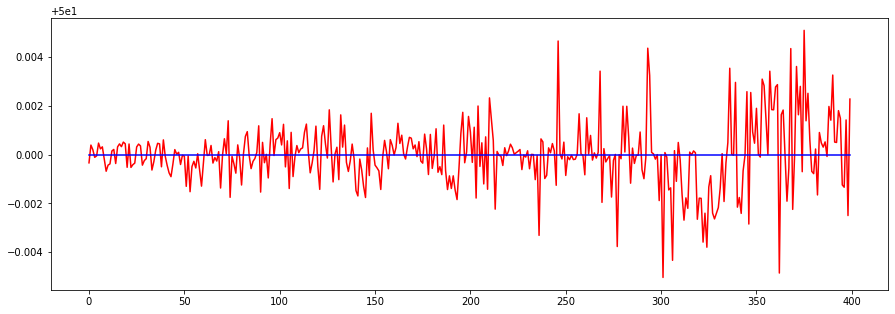

In [23]:
import matplotlib.pyplot as plt
from numpy.linalg import inv 
from tqdm import tqdm
import numpy as np
def deflection(Length,Breadth,Width,Area,E,nodes,pointload):
    I=(Breadth*(Width**3))/12
    Main=np.zeros((nodes*2,nodes*2))                                     #The stiffness matrix
    Force=np.zeros((nodes*2-2,1))                                        #Force matrix 
    Force[(nodes*2)-2-2][0]=pointload                                    #Initialization
    L=Length/(nodes-1)                                                   #Elemental length
    b=np.zeros((nodes*2,1))
    Add=np.zeros((nodes*2,nodes*2))  
    inverse=np.zeros((nodes*2-2,nodes*2-2))  
    for i in range(nodes*2):                                             #Global Matrix assemblage using elemental matrix
        for j in range(nodes*2):
            if i==j and i%2==0 and j%2==0 and i!=nodes*2-2 and j!=nodes*2-2:
                Add[i][j]=((E*I)/L**3)*12
                Add[i][j+1]=((E*I)/L**3)*6*L
                Add[i][j+2]=((E*I)/L**3)*-12
                Add[i][j+3]=((E*I)/L**3)*6*L

                Add[i+1][j]=((E*I)/L**3)*6*L
                Add[i+1][j+1]=((E*I)/L**3)*4*L**2
                Add[i+1][j+2]=((E*I)/L**3)*-6*L
                Add[i+1][j+3]=((E*I)/L**3)*2*L**2

                Add[i+2][j]=((E*I)/L**3)*-12
                Add[i+2][j+1]=((E*I)/L**3)*-6*L
                Add[i+2][j+2]=((E*I)/L**3)*12
                Add[i+2][j+3]=((E*I)/L**3)*-6*L

                Add[i+3][j]=((E*I)/L**3)*6*L
                Add[i+3][j+1]=((E*I)/L**3)*2*L**2
                Add[i+3][j+2]=((E*I)/L**3)*-6*L
                Add[i+3][j+3]=((E*I)/L**3)*4*L**2
                Main=Main+Add
                Add.fill(0)
    for i in range(nodes*2):
        for j in range(nodes*2):
            if i >1 and j>1:
                inverse[i-2][j-2]=Main[i][j]                            #Inverse of the matrix
    solution=np.dot(inv(inverse),Force)                                 #Finding the variable matrix by dot product
    return solution[(nodes*2)-1-2-1][0],(pointload*Length**3)/(3*E*I)
#Units are based on the user inputs 
#That is, keep the units consistent in the input variables
print("DEFLECTION OF CANTILEVER BEAM")
Length=float(input("Enter the length of Beam: "))                    #Beam length 
Breadth=float(input("Enter the Breadth of the cross section:"))      #Larger side of the cross section
Width=float(input("Enter the width of the cross section:"))          #Smaller side of cross section
Area=Breadth*Width                                                   #cross section area
E=float(input("Enter the Young's Modulus:"))                         #Youngs modulus input 
#nodes=int(input("Enter the Mesh nodes Number:(How many nodes you want)"))#The discritization
pointload=float(input("Enter the Load N at the end:"))               #Enter the Point load at the end node
FEM=[]
Deflection=[]
NODES=[]
for nodes in tqdm(range(600,1000),desc="Calculating"):
    NODES.append(nodes)
    F,D=deflection(Length,Breadth,Width,Area,E,nodes,pointload)
    FEM.append(F)
    Deflection.append(D)
fig=plt.figure(figsize=(15,5))
plt.plot(FEM,color='red')
plt.plot(Deflection,color='blue')
plt.show()

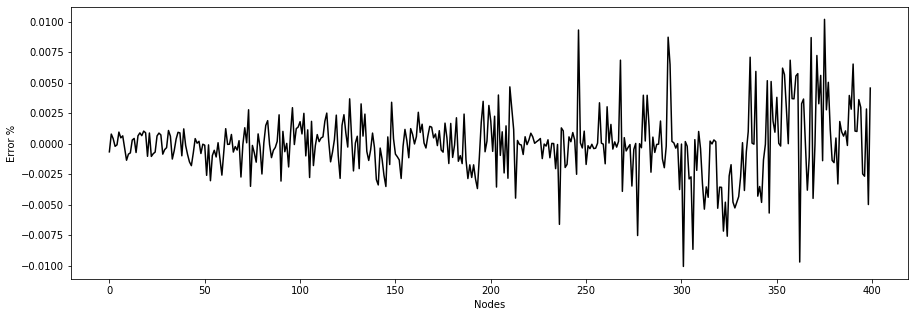

In [25]:
er=[]
for i in range(400):
    er.append(100*(FEM[i]-Deflection[i])/Deflection[i])
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(er,color='black')
ax.set(xlabel='Nodes',ylabel='Error %')
plt.show()